## Pengantar

#### [Warming Up!](https://academy.dqlab.id/main/livecode/253/448/2254?pr=0)

In [1]:
bersatulawancovid <- c("cuci tangan", "pakai masker", "jaga jarak")

bersatulawancovid

[1] "cuci tangan"  "pakai masker" "jaga jarak"

#### [Are You Ready?](https://academy.dqlab.id/main/livecode/253/448/2255?pr=0)

In [2]:
TRUE

[1] TRUE

## Bermain API

#### [Mengakses API covid.go.id](https://academy.dqlab.id/main/livecode/253/449/2256?pr=0)

In [4]:
library(httr)

set_config(config(ssl_verifypeer = 0L))

resp <- GET ("https://storage.googleapis.com/dqlab-dataset/update.json")

#### [Status Code](https://academy.dqlab.id/main/livecode/253/449/2259?pr=0)

In [5]:
status_code (resp)

[1] 200

#### [Status Code - 2](https://academy.dqlab.id/main/livecode/253/449/2260?pr=0)

In [6]:
resp$status_code

identical(resp$status_code, status_code(resp))

[1] 200

[1] TRUE

#### [Headers API](https://https://academy.dqlab.id/main/livecode/253/449/2261?pr=0)

In [7]:
headers(resp)

$`x-guploader-uploadid`
[1] "ADPycdsGgPE-JI-cpTp9lii0kZpT785NOnXtxClqRl5acljq6w4n4lVjaOWysrjelo2Dxajap7peRYHrSR-Lo-VHmtfUEcZdqNJH"

$`x-goog-generation`
[1] "1654513959565478"

$`x-goog-metageneration`
[1] "1"

$`x-goog-stored-content-encoding`
[1] "identity"

$`x-goog-stored-content-length`
[1] "311897"

$`x-goog-hash`
[1] "crc32c=GMMqEA=="

$`x-goog-hash`
[1] "md5=8aR/820+lfYyWNlv5bLUOQ=="

$`x-goog-storage-class`
[1] "STANDARD"

$`accept-ranges`
[1] "bytes"

$`content-length`
[1] "311897"

$server
[1] "UploadServer"

$date
[1] "Fri, 05 Aug 2022 11:39:15 GMT"

$expires
[1] "Fri, 05 Aug 2022 12:39:15 GMT"

$`cache-control`
[1] "public, max-age=3600"

$`last-modified`
[1] "Mon, 06 Jun 2022 11:12:39 GMT"

$etag
[1] "\"f1a47ff36d3e95f63258d96fe5b2d439\""

$`content-type`
[1] "application/json"

$age
[1] "0"

attr(,"class")
[1] "insensitive" "list"

#### [Mengekstrak isi Respon](https://academy.dqlab.id/main/livecode/253/449/2262?pr=0)

In [8]:
cov_id_raw <- content(resp, as = "parsed", simplifyVector = TRUE)

#### [Mengekstrak isi Respon - Pt 2](https://academy.dqlab.id/main/livecode/253/449/2263?pr=0)

In [9]:
length(cov_id_raw)
names(cov_id_raw)
cov_id_update <- cov_id_raw$update

[1] 2

[1] "data"   "update"

#### [Analisa Data](https://academy.dqlab.id/main/livecode/253/449/2264?pr=0)

In [10]:
lapply(cov_id_update,names)
cov_id_update$penambahan$tanggal
cov_id_update$penambahan$jumlah_sembuh
cov_id_update$penambahan$jumlah_meninggal
cov_id_update$total$jumlah_positif
cov_id_update$total$jumlah_meninggal

$penambahan
[1] "jumlah_positif"   "jumlah_meninggal" "jumlah_sembuh"    "jumlah_dirawat"  
[5] "tanggal"          "created"         

$harian
 [1] "key_as_string"        "key"                  "doc_count"           
 [4] "jumlah_meninggal"     "jumlah_sembuh"        "jumlah_positif"      
 [7] "jumlah_dirawat"       "jumlah_positif_kum"   "jumlah_sembuh_kum"   
[10] "jumlah_meninggal_kum" "jumlah_dirawat_kum"  

$total
[1] "jumlah_positif"   "jumlah_dirawat"   "jumlah_sembuh"    "jumlah_meninggal"

[1] "2022-05-14"

[1] 416

[1] 5

[1] 6050519

[1] 156453

## COVID-19 Di Sekitar

#### [Apa Kabar Jawa Barat?](https://academy.dqlab.id/main/livecode/253/450/2266?pr=0)

In [11]:
resp_jabar <- GET("https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json")
cov_jabar_raw <- content(resp_jabar, as = "parsed", simplifyVector = TRUE)


names(cov_jabar_raw)
cov_jabar_raw$kasus_total
cov_jabar_raw$meninggal_persen
cov_jabar_raw$sembuh_persen

[1] "last_date"            "provinsi"             "kasus_total"         
 [4] "kasus_tanpa_tgl"      "kasus_dengan_tgl"     "meninggal_persen"    
 [7] "meninggal_tanpa_tgl"  "meninggal_dengan_tgl" "sembuh_persen"       
[10] "sembuh_tanpa_tgl"     "sembuh_dengan_tgl"    "list_perkembangan"   
[13] "data"

[1] 1105134

[1] 1.425619

[1] 98.28238

#### [Memperoleh Informasi yang Lebih Lengkap](https://academy.dqlab.id/main/livecode/253/450/2267?pr=0)

In [12]:
cov_jabar <- cov_jabar_raw$list_perkembangan
str(cov_jabar)
head(cov_jabar)

'data.frame':	785 obs. of  9 variables:
 $ tanggal                     : num  1.58e+12 1.58e+12 1.58e+12 1.58e+12 1.58e+12 ...
 $ KASUS                       : int  1 1 1 1 0 0 0 0 0 1 ...
 $ MENINGGAL                   : int  1 0 0 0 0 0 0 0 1 0 ...
 $ SEMBUH                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIRAWAT_OR_ISOLASI          : int  0 1 1 1 0 0 0 0 -1 1 ...
 $ AKUMULASI_KASUS             : int  1 2 3 4 4 4 4 4 4 5 ...
 $ AKUMULASI_SEMBUH            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AKUMULASI_MENINGGAL         : int  1 1 1 1 1 1 1 1 2 2 ...
 $ AKUMULASI_DIRAWAT_OR_ISOLASI: int  0 1 2 3 3 3 3 3 2 3 ...


,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.583194e+12,1,1,0,0,1,0,1,0
2,1.583280e+12,1,0,0,1,2,0,1,1
3,1.583366e+12,1,0,0,1,3,0,1,2
4,1.583453e+12,1,0,0,1,4,0,1,3
5,1.583539e+12,0,0,0,0,4,0,1,3
6,1.583626e+12,0,0,0,0,4,0,1,3


#### [Menjinakkan Data](https://academy.dqlab.id/main/livecode/253/450/2268?pr=0)

In [13]:
library(dplyr)

new_cov_jabar <-
  cov_jabar %>% 
  select(-contains("DIRAWAT_OR_ISOLASI")) %>% 
  select(-starts_with("AKUMULASI")) %>% 
  rename(
    kasus_baru = KASUS,
    meninggal = MENINGGAL,
    sembuh = SEMBUH
    ) %>% 
  mutate(
    tanggal = as.POSIXct(tanggal / 1000, origin = "1970-01-01"),
    tanggal = as.Date(tanggal)
  )
  
str(new_cov_jabar)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	785 obs. of  4 variables:
 $ tanggal   : Date, format: "2020-03-03" "2020-03-04" ...
 $ kasus_baru: int  1 1 1 1 0 0 0 0 0 1 ...
 $ meninggal : int  1 0 0 0 0 0 0 0 1 0 ...
 $ sembuh    : int  0 0 0 0 0 0 0 0 0 0 ...


#### [Menunjukkan Melalui Gambar](https://academy.dqlab.id/main/livecode/253/450/2269?pr=0)

In [17]:
system('sudo apt install libcairo2-dev')
install.packages('hrbrthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’




NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



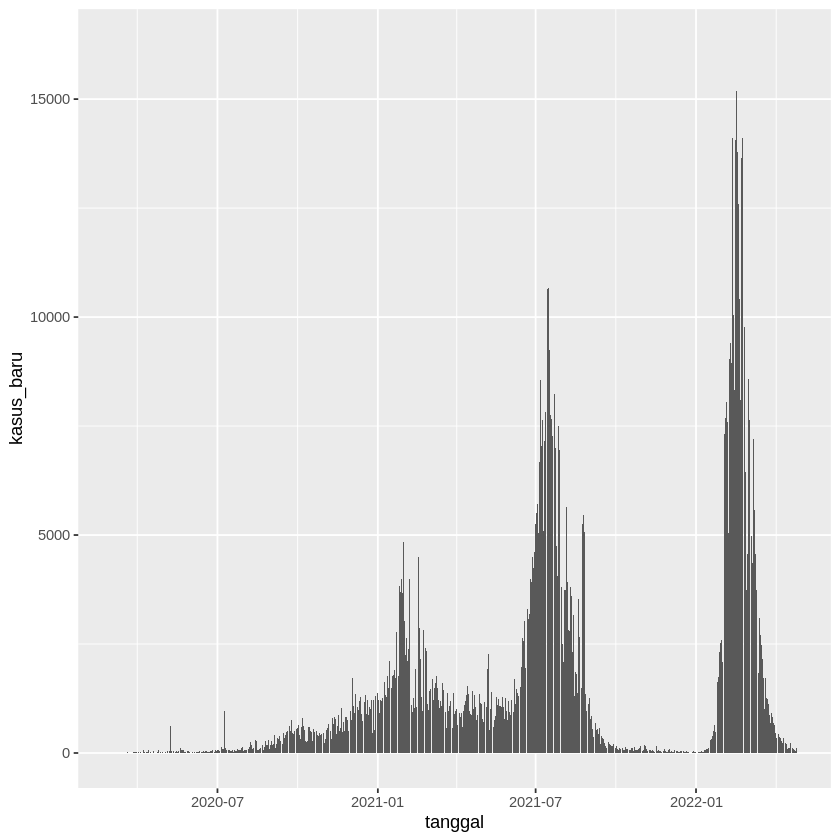

In [18]:
library(ggplot2)
library(hrbrthemes)

ggplot(data = new_cov_jabar, aes(x = tanggal, y = kasus_baru)) +
  geom_col()

#### [Menunjukkan Melalui Gambar - Pt 2](https://academy.dqlab.id/main/livecode/253/450/2270?pr=0)

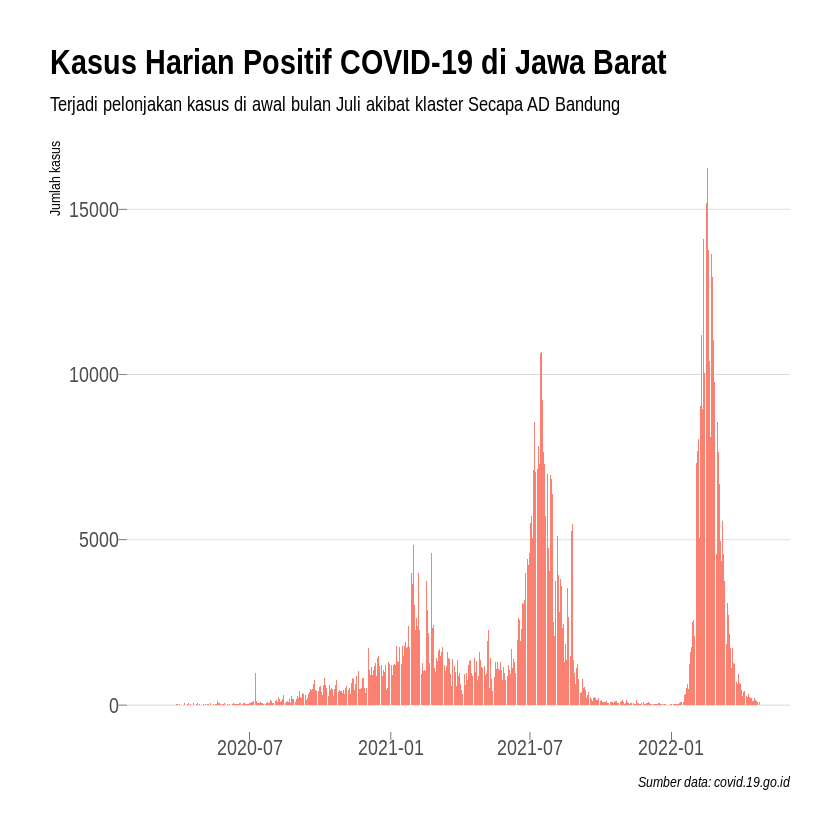

In [19]:
ggplot(new_cov_jabar, aes(tanggal, kasus_baru)) +
  geom_col(fill = "salmon") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Positif COVID-19 di Jawa Barat",
    subtitle = "Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13,
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

#### [Grafik untuk Kasus Sembuh](https://academy.dqlab.id/main/livecode/253/450/2271?pr=0)

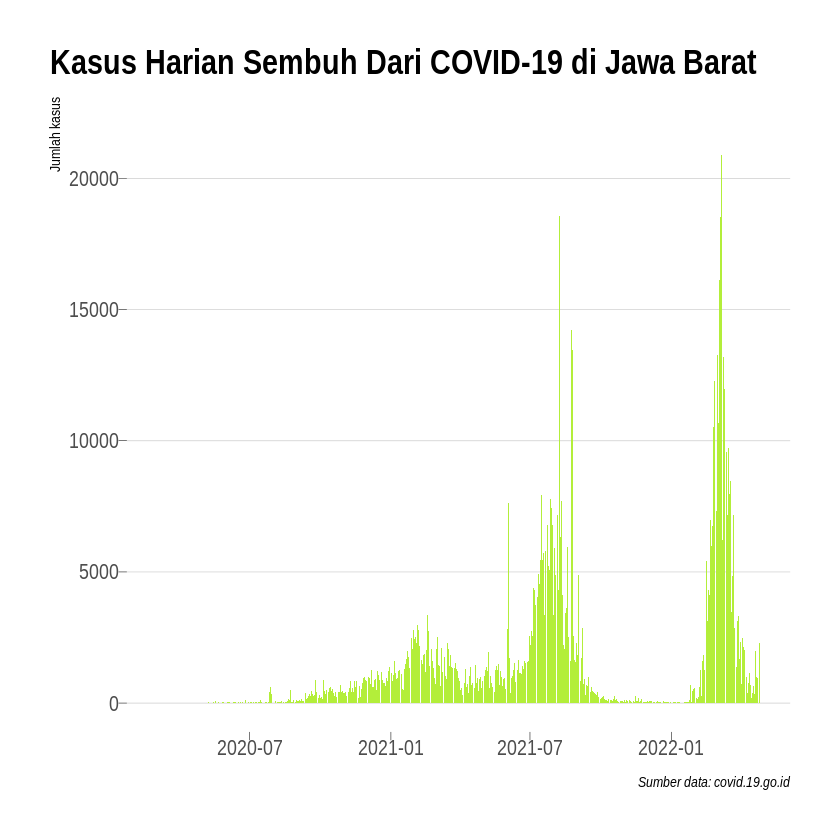

In [20]:
ggplot(new_cov_jabar, aes(tanggal, sembuh)) +
  geom_col(fill = "olivedrab2") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Sembuh Dari COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13, 
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

#### [Grafik untuk Kasus Meninggal](https://academy.dqlab.id/main/livecode/253/450/2273?pr=0)

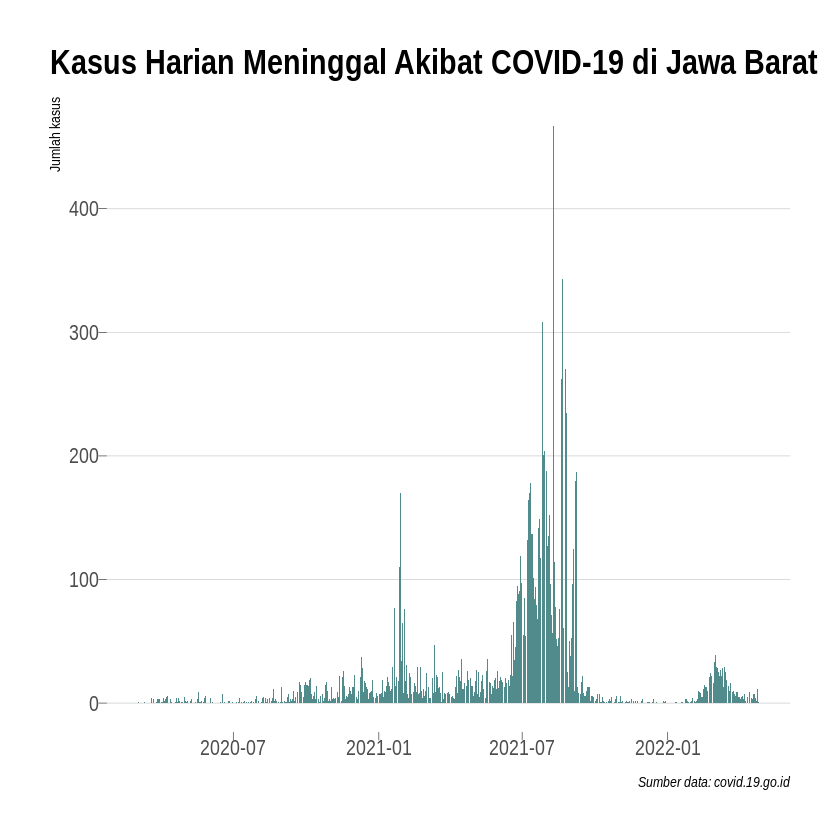

In [21]:
ggplot(new_cov_jabar, aes(tanggal, meninggal)) +
  geom_col(fill = "darkslategray4") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Meninggal Akibat COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13, 
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

## Menggali Lebih Dalam

#### [Apakah Pekan ini Lebih Baik?](https://academy.dqlab.id/main/livecode/253/451/2274?pr=0)

In [23]:
library(lubridate)

cov_jabar_pekanan <- new_cov_jabar %>% 
  count(
    tahun = year(tanggal),
    pekan_ke = week(tanggal),
    wt = kasus_baru,
    name = "jumlah"
  )

glimpse(cov_jabar_pekanan)

Rows: 115
Columns: 3
$ tahun    <dbl> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2…
$ pekan_ke <dbl> 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24…
$ jumlah   <int> 1, 3, 16, 41, 98, 149, 153, 155, 156, 284, 803, 175, 395, 203…


#### [Menjawab Pertanyaan](https://academy.dqlab.id/main/livecode/253/451/2275?pr=0)

In [24]:
cov_jabar_pekanan <-
  cov_jabar_pekanan %>% 
  mutate(
    jumlah_pekanlalu = dplyr::lag(jumlah, 1),
    jumlah_pekanlalu = ifelse(is.na(jumlah_pekanlalu), 0, jumlah_pekanlalu),
    lebih_baik = jumlah < jumlah_pekanlalu
  )
  
glimpse(cov_jabar_pekanan)

Rows: 115
Columns: 5
$ tahun            <dbl> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,…
$ pekan_ke         <dbl> 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22…
$ jumlah           <int> 1, 3, 16, 41, 98, 149, 153, 155, 156, 284, 803, 175, …
$ jumlah_pekanlalu <dbl> 0, 1, 3, 16, 41, 98, 149, 153, 155, 156, 284, 803, 17…
$ lebih_baik       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…


#### [Membuat Bar Chart](https://academy.dqlab.id/main/livecode/253/451/2276?pr=0)

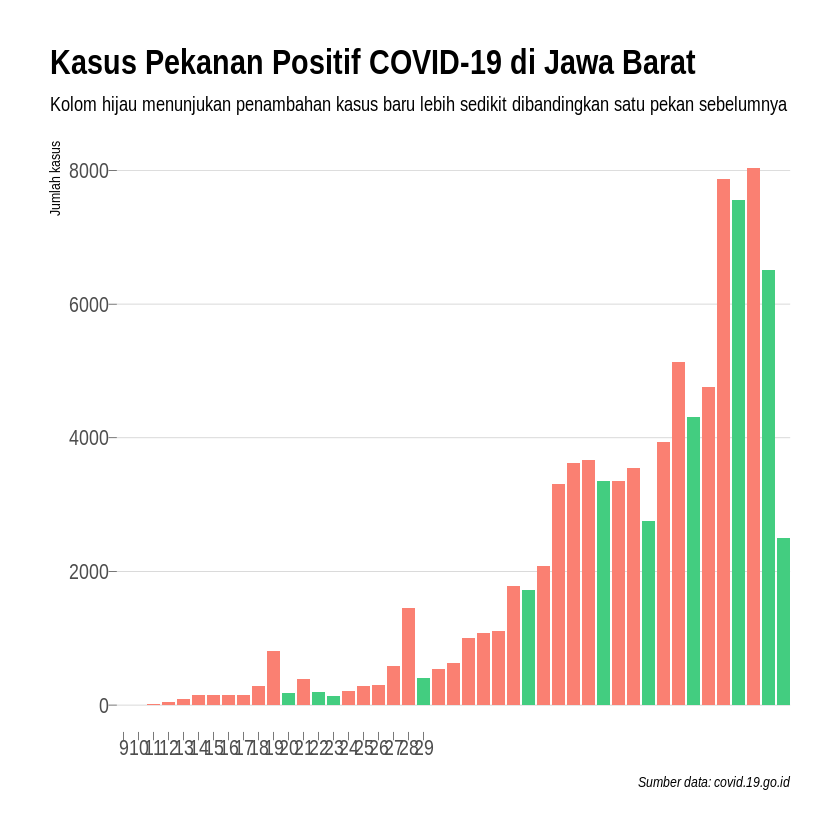

In [25]:
ggplot(cov_jabar_pekanan[cov_jabar_pekanan$tahun==2020,], aes(pekan_ke, jumlah, fill = lebih_baik)) +
  geom_col(show.legend = FALSE) +
  scale_x_continuous(breaks = 9:29, expand = c(0, 0)) +
  scale_fill_manual(values = c("TRUE" = "seagreen3", "FALSE" = "salmon")) +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Pekanan Positif COVID-19 di Jawa Barat",
    subtitle = "Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13,
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

#### [Pola dan Dinamika](https://academy.dqlab.id/main/livecode/253/451/2277?pr=0)

In [26]:
cov_jabar_akumulasi <- 
  new_cov_jabar %>% 
  transmute(
    tanggal,
    akumulasi_aktif = cumsum(kasus_baru) - cumsum(sembuh) - cumsum(meninggal),
    akumulasi_sembuh = cumsum(sembuh),
    akumulasi_meninggal = cumsum(meninggal)
  )

tail(cov_jabar_akumulasi)

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
,<date>,<int>,<int>,<int>
780,2022-04-21,11628,1077361,15731
781,2022-04-22,10753,1078344,15735
782,2022-04-23,9882,1079297,15737
783,2022-04-24,8709,1080519,15748
784,2022-04-25,5428,1083851,15751
785,2022-04-26,3253,1086129,15752


#### [Membuat Line Chart](https://academy.dqlab.id/main/livecode/253/451/2278?pr=0)

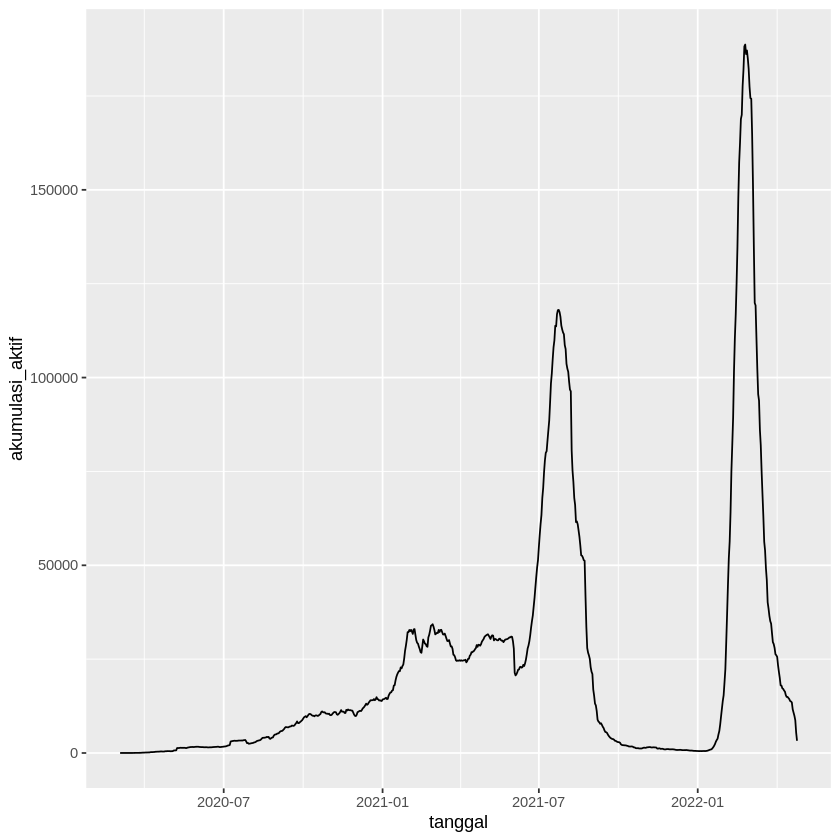

In [27]:
ggplot(data = cov_jabar_akumulasi, aes(x = tanggal, y = akumulasi_aktif)) +
  geom_line()

#### [Kabar Buruk dan Kabar Baik](https://academy.dqlab.id/main/livecode/253/451/2279?pr=0)

In [28]:
TRUE

[1] TRUE

#### [Transformasi Data](https://academy.dqlab.id/main/livecode/253/451/2281?pr=0)

In [37]:
library(tidyr)

dim(cov_jabar_akumulasi)

cov_jabar_akumulasi_pivot <- 
  cov_jabar_akumulasi %>% 
  gather(
    key = "kategori",
    value = "jumlah",
    -tanggal
  ) %>% 
  mutate(
    kategori = sub(pattern = "akumulasi_", replacement = "", kategori)
  )

dim(cov_jabar_akumulasi_pivot)

glimpse(cov_jabar_akumulasi_pivot)

[1] 785   4

[1] 2355    3

Rows: 2,355
Columns: 3
$ tanggal  <date> 2020-03-03, 2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07, …
$ kategori <chr> "aktif", "aktif", "aktif", "aktif", "aktif", "aktif", "aktif"…
$ jumlah   <int> 0, 1, 2, 3, 3, 3, 3, 3, 2, 3, 6, 6, 4, 2, 13, 14, 17, 29, 34,…


#### [pivot_longer()](https://academy.dqlab.id/main/livecode/253/451/2290?pr=0)

In [38]:
cov_jabar_akumulasi_pivot <-
  cov_jabar_akumulasi %>%
  pivot_longer(
    cols = -tanggal,
    names_to = "kategori",
    names_prefix = "akumulasi_",
    values_to = "jumlah"
    )

In [39]:
head(cov_jabar_akumulasi_pivot, 9)

tanggal,kategori,jumlah
<date>,<chr>,<int>
2020-03-03,aktif,0
2020-03-03,sembuh,0
2020-03-03,meninggal,1
2020-03-04,aktif,1
2020-03-04,sembuh,0
2020-03-04,meninggal,1
2020-03-05,aktif,2
2020-03-05,sembuh,0
2020-03-05,meninggal,1


#### [Tahap Terakhir](https://academy.dqlab.id/main/livecode/253/451/2282?pr=0)

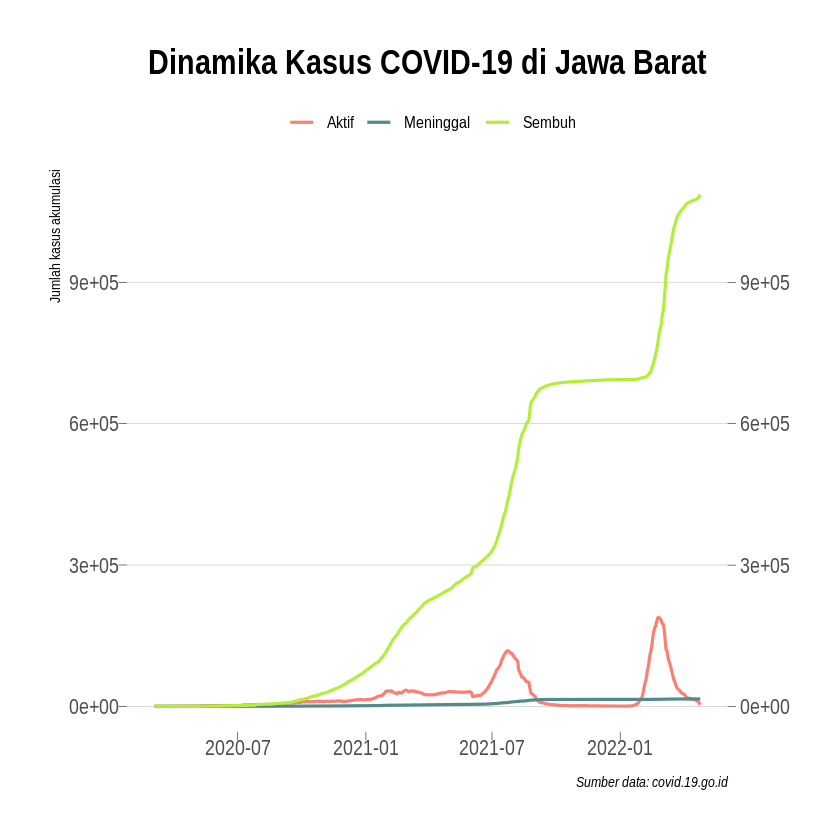

In [40]:
ggplot(cov_jabar_akumulasi_pivot, aes(tanggal, jumlah, colour = (kategori))) +
  geom_line(size = 0.9) +
  scale_y_continuous(sec.axis = dup_axis(name = NULL)) +
  scale_colour_manual(
    values = c(
      "aktif" = "salmon",
      "meninggal" = "darkslategray4",
      "sembuh" = "olivedrab2"
    ),
    labels = c("Aktif", "Meninggal", "Sembuh")
  ) +
  labs(
    x = NULL,
    y = "Jumlah kasus akumulasi",
    colour = NULL,
    title = "Dinamika Kasus COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13,
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "top"
  )